In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

In [2]:
# load dataset
mobile_price=pd.read_csv('./train.csv')

In [223]:
mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# target labels
mobile_price.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [6]:
# Divide the labels into two groups, cheap and expensive
mobile_price['price_range']=mobile_price.price_range.replace({0:0,1:0,2:1,3:1})

In [7]:
# result
mobile_price.price_range.value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

In [8]:
# Data dimensions when duplicate data is deleted
mobile_price.drop_duplicates().shape

(2000, 21)

<h4>There is no duplicate data due to the result.</h4>

In [9]:
from scipy import stats

In [10]:
# remove outliers from dataset
mobile_price=mobile_price[(np.abs(stats.zscore(mobile_price)) < 3).all(axis=1)]

In [11]:
mobile_price.shape

(1988, 21)

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
# split train and test set
spliter=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_idx,test_idx in spliter.split(mobile_price,mobile_price.price_range):
    train=mobile_price.iloc[train_idx]
    test=mobile_price.iloc[test_idx]

In [14]:
train.shape

(1491, 21)

In [15]:
test.shape

(497, 21)

In [16]:
mobile_price.price_range.value_counts()/len(mobile_price)

1    0.500503
0    0.499497
Name: price_range, dtype: float64

In [17]:
train.price_range.value_counts()/len(train)

1    0.500335
0    0.499665
Name: price_range, dtype: float64

In [18]:
test.price_range.value_counts()/len(test)

1    0.501006
0    0.498994
Name: price_range, dtype: float64

In [19]:
x_train=train.drop('price_range',axis=1)
y_train=train.price_range
x_test=test.drop('price_range',axis=1)
y_test=test.price_range

In [20]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
879,906,0,2.1,1,7,0,18,0.1,136,2,11,1102,1793,3412,13,8,16,1,0,0
1655,1670,1,3.0,0,14,0,62,0.5,114,8,20,1117,1330,3024,6,0,20,0,0,1
1972,1191,0,0.8,0,6,1,46,0.8,89,6,9,42,807,824,19,18,7,1,0,0
88,668,0,0.5,1,0,0,3,0.1,155,5,13,666,1203,2746,9,5,8,1,1,1
830,571,0,0.6,0,1,1,43,0.5,141,3,8,224,783,2587,7,5,18,1,0,0


In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
# feature scaling
scaler=Normalizer()
x_train=pd.DataFrame(data=scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(data=scaler.transform(x_test),columns=x_test.columns)

In [23]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.220313,0.000000,0.000511,0.000243,0.001702,0.000000,0.004377,0.000024,0.033071,0.000486,0.002675,0.267974,0.436005,0.829698,0.003161,0.001945,0.003891,0.000243,0.000000,0.000000
1,0.431653,0.000258,0.000775,0.000000,0.003619,0.000000,0.016025,0.000129,0.029466,0.002068,0.005169,0.288716,0.343771,0.781627,0.001551,0.000000,0.005169,0.000000,0.000000,0.000258
2,0.716716,0.000000,0.000481,0.000000,0.003611,0.000602,0.027682,0.000481,0.053558,0.003611,0.005416,0.025275,0.485634,0.495864,0.011434,0.010832,0.004212,0.000602,0.000000,0.000000
3,0.212284,0.000000,0.000159,0.000318,0.000000,0.000000,0.000953,0.000032,0.049257,0.001589,0.004131,0.211648,0.382302,0.872652,0.002860,0.001589,0.002542,0.000318,0.000318,0.000318
4,0.205720,0.000000,0.000216,0.000000,0.000360,0.000360,0.015492,0.000180,0.050799,0.001081,0.002882,0.080703,0.282099,0.932043,0.002522,0.001801,0.006485,0.000360,0.000000,0.000000


In [24]:
y_train=pd.Series(data=y_train.values)
y_test=pd.Series(data=y_test.values)

# 1

In [25]:
from sklearn.dummy import DummyClassifier,DummyRegressor

In [26]:
class ForwardSelectin:
    def __init__(self,
                 estimator,
                 scoring_strategy='AUC',
                 n_features_to_select=10,
                 stop_if_no_improvement=True,
                 problem_type='classification'):
        self.estimator=estimator
        self.n_features_to_select=n_features_to_select
        self.stop_if_no_improvement=stop_if_no_improvement
        self.problem_type=problem_type
        self.scoring_strategy=eval('self.'+scoring_strategy)
        
    def fit(self,x,y):
        self.feature_names_=[]
        train_features=[]
        features=list(x.columns)
        #null model
        if self.problem_type=='classification':
            estimator=DummyClassifier(strategy='most_frequent')
        else:
            estimator=DummyRegressor(strategy='mean')
        pred=estimator.fit(x,y).predict(x)
        preveus_score=self.scoring_strategy(y,pred)
        for i in range(self.n_features_to_select):
            scores=np.zeros((len(features)))
            estimator=self.estimator
            for j in range(len(features)):
                train_features=self.feature_names_+[features[j]]
                estimator.fit(x[train_features],y)
                pred=estimator.predict(x[train_features])
                scores[j]=self.scoring_strategy(y,pred)
            if self.stop_if_no_improvement and scores.max()<=preveus_score:
                return self.feature_names_
            preveus_score=scores.max()
            best=features[scores.argmax()]
            self.feature_names_.append(best)
            features.remove(best)
        return self.feature_names_
    def AUC(self,y_true,pred):
        fpr, tpr, thresholds = metrics.roc_curve(y_true.values, pred)
        return metrics.auc(fpr, tpr)

# 2

In [285]:
from sklearn.linear_model import LogisticRegression

In [321]:
classifier=LogisticRegression(random_state=42)

In [322]:
# select 10 features with forward selection method
fs=ForwardSelectin(classifier,stop_if_no_improvement=False)
selected_features=fs.fit(x_train,y_train)

In [323]:
selected_features

['ram',
 'mobile_wt',
 'int_memory',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores']

In [324]:
x_train[selected_features]

,ram,mobile_wt,int_memory,blue,clock_speed,dual_sim,fc,four_g,m_dep,n_cores
0,0.829698,0.033071,0.004377,0.000000,0.000511,0.000243,0.001702,0.000000,0.000024,0.000486
1,0.781627,0.029466,0.016025,0.000258,0.000775,0.000000,0.003619,0.000000,0.000129,0.002068
2,0.495864,0.053558,0.027682,0.000000,0.000481,0.000000,0.003611,0.000602,0.000481,0.003611
3,0.872652,0.049257,0.000953,0.000000,0.000159,0.000318,0.000000,0.000000,0.000032,0.001589
4,0.932043,0.050799,0.015492,0.000000,0.000216,0.000000,0.000360,0.000360,0.000180,0.001081
...,...,...,...,...,...,...,...,...,...,...
1486,0.570778,0.050389,0.019620,0.000000,0.001115,0.000000,0.000000,0.000446,0.000312,0.001784
1487,0.659417,0.032321,0.004531,0.000302,0.000755,0.000000,0.003021,0.000302,0.000091,0.002417
1488,0.787212,0.042104,0.006167,0.000000,0.000595,0.000000,0.000000,0.000000,0.000106,0.001276
1489,0.543479,0.060930,0.008450,0.000445,0.000311,0.000445,0.000000,0.000000,0.000044,0.000889


In [325]:
classifier=LogisticRegression(max_iter=3000,random_state=42)

In [326]:
classifier.fit(x_train[selected_features],y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [327]:
pred_train=classifier.predict(x_train[selected_features])

In [328]:
train_precision=metrics.precision_score(y_train,pred_train)
print('precision for train data: ',train_precision)

precision for train data:  0.780952380952381


In [329]:
train_recall=metrics.recall_score(y_train,pred_train)
print('recall for train data: ',train_recall)

recall for train data:  0.8793565683646113


In [330]:
train_f1_score=metrics.f1_score(y_train,pred_train)
print('f1-score for train data: ',train_f1_score)

f1-score for train data:  0.8272383354350568


In [331]:
pred_test=classifier.predict(x_test[selected_features])

In [332]:
test_precision=metrics.precision_score(y_test,pred_test)
print('precision for test data: ',test_precision)

precision for test data:  0.7663230240549829


In [333]:
test_recall=metrics.recall_score(y_test,pred_test)
print('recall for test data: ',test_recall)

recall for test data:  0.8955823293172691


In [334]:
test_f1_score=metrics.f1_score(y_test,pred_test)
print('f1-score for test data: ',test_f1_score)

f1-score for test data:  0.8259259259259261


In [335]:
classifier.coef_

array([[ 8.00611646, -4.24560378, -1.01709698, -0.0151324 , -0.04777429,
        -0.01560425, -0.11398382, -0.01536768, -0.01684771, -0.12891172]])

# 3

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA(n_components=10,random_state=42)

In [42]:
transformed_train=pca.fit_transform(x_train)
transformed_test=pca.transform(x_test)

In [43]:
transformed_train.shape

(1491, 10)

In [44]:
transformed_test.shape

(497, 10)

In [45]:
transformed_train

array([[-2.04613143e-01, -1.85904799e-01, -1.18530647e-02, ...,
         8.06656123e-04, -6.96939069e-04, -3.78471002e-04],
       [-1.14938391e-01,  5.38965830e-03, -1.12781748e-01, ...,
        -1.44324816e-03, -3.56993950e-03, -2.80136915e-04],
       [ 2.11344459e-01,  2.83922331e-01,  1.49325663e-01, ...,
         4.61872648e-03,  7.46005501e-03, -2.57897562e-03],
       ...,
       [-1.30375705e-01, -1.63350270e-01, -8.87996977e-02, ...,
         8.75765350e-04, -1.06826384e-03,  1.24437016e-03],
       [ 1.53409376e-01,  3.36443541e-01, -9.97568100e-02, ...,
        -1.67275971e-04,  1.18546110e-03,  1.50303217e-03],
       [ 3.66780725e-01, -1.15136334e-01, -1.25950936e-01, ...,
         1.67243854e-04, -1.75022355e-03,  2.05222581e-03]])

In [46]:
transformed_test

array([[-3.15149044e-01, -6.40261637e-02, -4.49108715e-02, ...,
         4.17589560e-03,  2.52783680e-03, -7.49309748e-04],
       [-3.43994846e-01,  4.72497314e-02,  1.06357397e-01, ...,
         1.83218109e-03, -1.20600471e-03,  4.83177072e-05],
       [-3.07184308e-01, -5.43698796e-02,  1.26496534e-01, ...,
        -1.65797639e-03, -4.84013648e-04,  3.77434914e-05],
       ...,
       [-3.63711054e-02,  3.17021962e-02, -7.73860791e-02, ...,
        -1.60106127e-03, -1.66763097e-03,  1.51243453e-03],
       [-2.39694203e-01,  1.58400313e-01, -7.66224506e-02, ...,
        -7.29932287e-04,  2.52053750e-03, -6.69956879e-04],
       [ 2.90620414e-01, -1.80659791e-02, -1.49003274e-01, ...,
        -1.44322845e-03,  9.51656148e-04, -6.85067977e-04]])

# 4

In [47]:
classifier.fit(transformed_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [48]:
pred_train=classifier.predict(transformed_train)

In [49]:
train_precision=metrics.precision_score(y_train,pred_train)
print('precision for train data: ',train_precision)

precision for train data:  0.7801932367149759


In [50]:
train_recall=metrics.recall_score(y_train,pred_train)
print('recall for train data: ',train_recall)

recall for train data:  0.8659517426273459


In [51]:
train_f1_score=metrics.f1_score(y_train,pred_train)
print('f1-score for train data: ',train_f1_score)

f1-score for train data:  0.8208386277001272


In [52]:
pred_test=classifier.predict(transformed_test)

In [53]:
test_precision=metrics.precision_score(y_test,pred_test)
print('precision for test data: ',test_precision)

precision for test data:  0.7829181494661922


In [54]:
test_recall=metrics.recall_score(y_test,pred_test)
print('recall for test data: ',test_recall)

recall for test data:  0.8835341365461847


In [55]:
test_f1_score=metrics.f1_score(y_test,pred_test)
print('f1-score for test data: ',test_f1_score)

f1-score for test data:  0.830188679245283


# 5

# No questions asked

# 6

In [56]:
# reload dataset
mobile_price=pd.read_csv('./train.csv')

In [57]:
for train_idx,test_ix in spliter.split(mobile_price,mobile_price.price_range):
    train_org=mobile_price.iloc[train_idx]
    test_org=mobile_price.iloc[test_idx]

In [58]:
classifier.fit(train_org.drop('price_range',axis=1),train_org.price_range)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [59]:
# train model on origina dataset to compare with exp and log transforms

In [60]:
# predict train data with model
pred=classifier.predict(train_org.drop('price_range',axis=1))
print(metrics.classification_report(train_org.price_range,pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       375
           1       0.68      0.68      0.68       375
           2       0.60      0.56      0.58       375
           3       0.75      0.81      0.78       375

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



In [61]:
# predict test data with model
pred=classifier.predict(test_org.drop('price_range',axis=1))
print(metrics.classification_report(test_org.price_range,pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       129
           1       0.61      0.69      0.65       121
           2       0.53      0.48      0.50       133
           3       0.69      0.75      0.71       114

    accuracy                           0.69       497
   macro avg       0.69      0.69      0.69       497
weighted avg       0.69      0.69      0.69       497



# a

In [62]:
mobile_price

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [63]:
pd.cut(mobile_price.battery_power,10,labels=[1,2,3,4,5,6,7,8,9,10])

0        3
1        4
2        1
3        1
4        9
        ..
1995     2
1996    10
1997    10
1998     7
1999     1
Name: battery_power, Length: 2000, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [64]:
from sklearn.preprocessing import KBinsDiscretizer
from copy import deepcopy

In [65]:
# binning with 4 bins and quantile strategy
discretizer=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
mobile_price_q1=deepcopy(mobile_price)
mobile_price_q1['discrete_battary_power']=discretizer.fit_transform(mobile_price.battery_power.values.reshape((-1,1))).astype(np.int64)
mobile_price_q1.drop('battery_power',axis=1,inplace=True)
mobile_price_q1

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,discrete_battary_power
0,0,2.2,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,19,0,0,1,1,0
1,1,0.5,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,7,1,1,0,2,1
2,1,0.5,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,9,1,1,0,2,0
3,1,2.5,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,11,1,0,0,2,0
4,1,1.2,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,15,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,19,1,1,0,0,0
1996,1,2.6,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,16,1,1,1,2,3
1997,0,0.9,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,5,1,1,0,3,3
1998,0,0.9,0,4,1,46,0.1,145,5,5,...,670,869,18,10,19,1,1,1,0,2


In [66]:
discretizer.bin_edges_

array([array([ 501.  ,  851.75, 1226.  , 1615.25, 1998.  ])], dtype=object)

In [67]:
# binning with 10 bins and uniform strategy
discretizer=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
mobile_price_q2=deepcopy(mobile_price)
mobile_price_q2['discrete_battary_power']=discretizer.fit_transform(mobile_price.battery_power.values.reshape((-1,1))).astype(np.int64)
mobile_price_q2.drop('battery_power',axis=1,inplace=True)
mobile_price_q2

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,discrete_battary_power
0,0,2.2,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,19,0,0,1,1,2
1,1,0.5,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,7,1,1,0,2,3
2,1,0.5,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,9,1,1,0,2,0
3,1,2.5,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,11,1,0,0,2,0
4,1,1.2,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,15,1,1,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,19,1,1,0,0,1
1996,1,2.6,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,16,1,1,1,2,9
1997,0,0.9,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,5,1,1,0,3,9
1998,0,0.9,0,4,1,46,0.1,145,5,5,...,670,869,18,10,19,1,1,1,0,6


In [68]:
discretizer.bin_edges_

array([array([ 501. ,  650.7,  800.4,  950.1, 1099.8, 1249.5, 1399.2, 1548.9,
       1698.6, 1848.3, 1998. ])], dtype=object)

In [69]:
# binning with 6 bins and kmeans strategy
discretizer=KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='kmeans')
mobile_price_q3=deepcopy(mobile_price)
mobile_price_q3['discrete_battary_power']=discretizer.fit_transform(mobile_price.battery_power.values.reshape((-1,1))).astype(np.int64)
mobile_price_q3.drop('battery_power',axis=1,inplace=True)
mobile_price_q3

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,discrete_battary_power
0,0,2.2,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,19,0,0,1,1,1
1,1,0.5,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,7,1,1,0,2,2
2,1,0.5,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,9,1,1,0,2,0
3,1,2.5,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,11,1,0,0,2,0
4,1,1.2,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,15,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,19,1,1,0,0,1
1996,1,2.6,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,16,1,1,1,2,5
1997,0,0.9,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,5,1,1,0,3,5
1998,0,0.9,0,4,1,46,0.1,145,5,5,...,670,869,18,10,19,1,1,1,0,4


In [70]:
discretizer.bin_edges_

array([array([ 501.        ,  746.17836176,  995.49664652, 1247.23007589,
       1499.04597994, 1751.12441469, 1998.        ])], dtype=object)

# b

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
mobile_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [73]:
cat_feature_list=['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi']
one_hot_encoder=OneHotEncoder()
battery_cat=one_hot_encoder.fit_transform(mobile_price_q1[cat_feature_list].values).toarray().astype(np.int32)

In [74]:
battery_cat

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1]])

In [75]:
mobile_price_one_hot=deepcopy(mobile_price)
mobile_price_one_hot=mobile_price_one_hot.drop(cat_feature_list,axis=1)
for i in range(len(cat_feature_list)):
    label=cat_feature_list[i]
    mobile_price_one_hot[f'not {label}']=battery_cat[:,2*i]
    mobile_price_one_hot[f'{label}']=battery_cat[:,2*i+1]    

In [76]:
mobile_price_one_hot

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,not dual_sim,dual_sim,not four_g,four_g,not three_g,three_g,not touch_screen,touch_screen,not wifi,wifi
0,842,2.2,1,7,0.6,188,2,2,20,756,...,1,0,1,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,0,1,0,1,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,0,1,0,1,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,1,0,1,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,...,0,1,0,1,0,1,0,1,1,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,...,0,1,1,0,0,1,0,1,0,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,...,0,1,0,1,0,1,0,1,1,0
1998,1512,0.9,4,46,0.1,145,5,5,336,670,...,1,0,0,1,0,1,0,1,0,1


# C

<div>When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.<br/>
reference:<br/>
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9
</div>

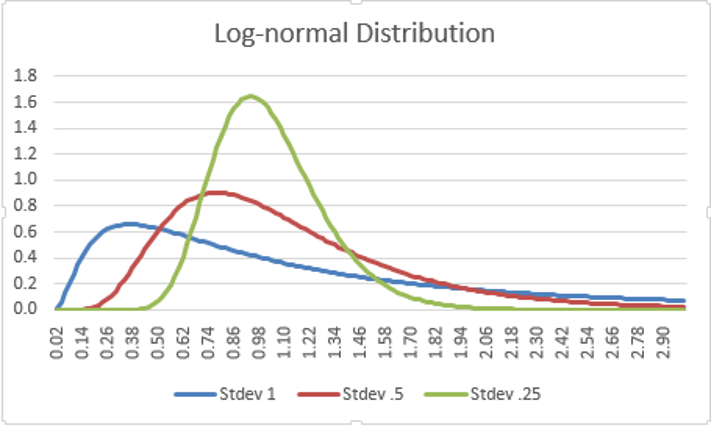

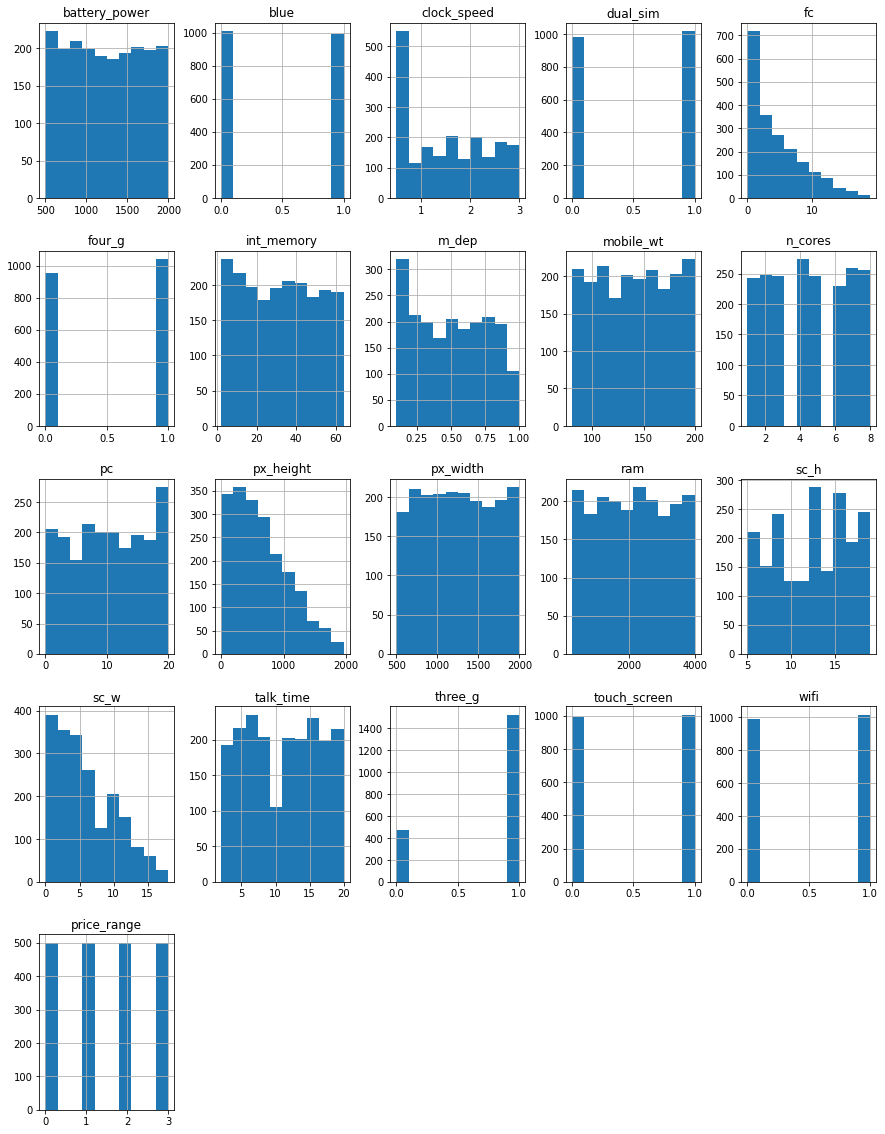

In [77]:
%matplotlib inline
mobile_price.hist(figsize=(15,20))
plt.show()

<div>Since most features have a relatively uniform distribution and only a few features have a distribution close to the log-normal, this conversion is unlikely to have much effect on model performance. However, we perform the conversion on all non-categorical features and measure the accuracy of the logistic regression model on them.</div>

In [78]:
ordinal_features=list(mobile_price.columns)
for i in cat_feature_list:
    ordinal_features.remove(i)
ordinal_features.remove('price_range')
ordinal_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [79]:
mobile_price_log=deepcopy(mobile_price)

In [80]:
# apply log transform on ordinal features of dataset
mobile_price_log[ordinal_features]=np.log(mobile_price_log[ordinal_features])
mobile_price_log

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,6.735780,0,0.788457,0,0.000000,0,1.945910,-0.510826,5.236442,0.693147,...,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,0,0,1,1
1,6.928538,1,-0.693147,1,-inf,1,3.970292,-0.356675,4.912655,1.098612,...,6.807935,7.594884,7.875119,2.833213,1.098612,1.945910,1,1,0,2
2,6.333280,1,-0.693147,1,0.693147,1,3.713572,-0.105361,4.976734,1.609438,...,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,1,1,0,2
3,6.421622,1,0.916291,0,-inf,0,2.302585,-0.223144,4.875197,1.791759,...,7.103322,7.487734,7.926242,2.772589,2.079442,2.397895,1,0,0,2
4,7.507141,1,0.182322,0,2.564949,1,3.784190,-0.510826,4.948760,0.693147,...,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6.677083,1,-0.693147,1,-inf,1,0.693147,-0.223144,4.663439,1.791759,...,7.108244,7.544332,6.504288,2.564949,1.386294,2.944439,1,1,0,0
1996,7.583248,1,0.955511,1,-inf,0,3.663562,-1.609438,5.231109,1.386294,...,6.818924,7.583248,7.616776,2.397895,2.302585,2.772589,1,1,1,2
1997,7.555382,0,-0.105361,1,0.000000,1,3.583519,-0.356675,4.682131,2.079442,...,6.766192,7.397562,8.025189,2.197225,0.000000,1.609438,1,1,0,3
1998,7.321189,0,-0.105361,0,1.386294,1,3.828641,-2.302585,4.976734,1.609438,...,5.817111,6.507278,6.767343,2.890372,2.302585,2.944439,1,1,1,0


In [81]:
# remove nan and inf values caused by log 
mobile_price_log=mobile_price_log[mobile_price_log.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [82]:
mobile_price_log

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,6.735780,0,0.788457,0,0.000000,0,1.945910,-0.510826,5.236442,0.693147,...,2.995732,6.628041,7.843456,2.197225,1.945910,2.944439,0,0,1,1
2,6.333280,1,-0.693147,1,0.693147,1,3.713572,-0.105361,4.976734,1.609438,...,7.141245,7.447751,7.864420,2.397895,0.693147,2.197225,1,1,0,2
4,7.507141,1,0.182322,0,2.564949,1,3.784190,-0.510826,4.948760,0.693147,...,7.096721,7.100027,7.252054,2.079442,0.693147,2.708050,1,1,0,1
5,7.527794,0,-0.693147,1,1.098612,0,3.091042,-0.356675,5.099866,0.000000,...,6.911747,7.410952,6.972606,2.833213,0.000000,2.302585,1,0,0,1
6,7.507141,0,0.530628,0,1.386294,1,2.302585,-0.223144,4.934474,2.079442,...,5.942799,6.925595,8.077137,2.564949,2.079442,2.890372,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,6.513230,1,1.064711,1,0.000000,0,3.044522,-1.609438,5.288267,1.098612,...,6.356108,7.500529,7.073270,1.791759,1.098612,1.386294,1,1,1,0
1994,6.754604,0,0.788457,0,0.000000,0,3.912023,-2.302585,4.430817,0.000000,...,6.269096,7.255591,8.288534,2.833213,2.772589,1.098612,1,1,0,3
1997,7.555382,0,-0.105361,1,0.000000,1,3.583519,-0.356675,4.682131,2.079442,...,6.766192,7.397562,8.025189,2.197225,0.000000,1.609438,1,1,0,3
1998,7.321189,0,-0.105361,0,1.386294,1,3.828641,-2.302585,4.976734,1.609438,...,5.817111,6.507278,6.767343,2.890372,2.302585,2.944439,1,1,1,0


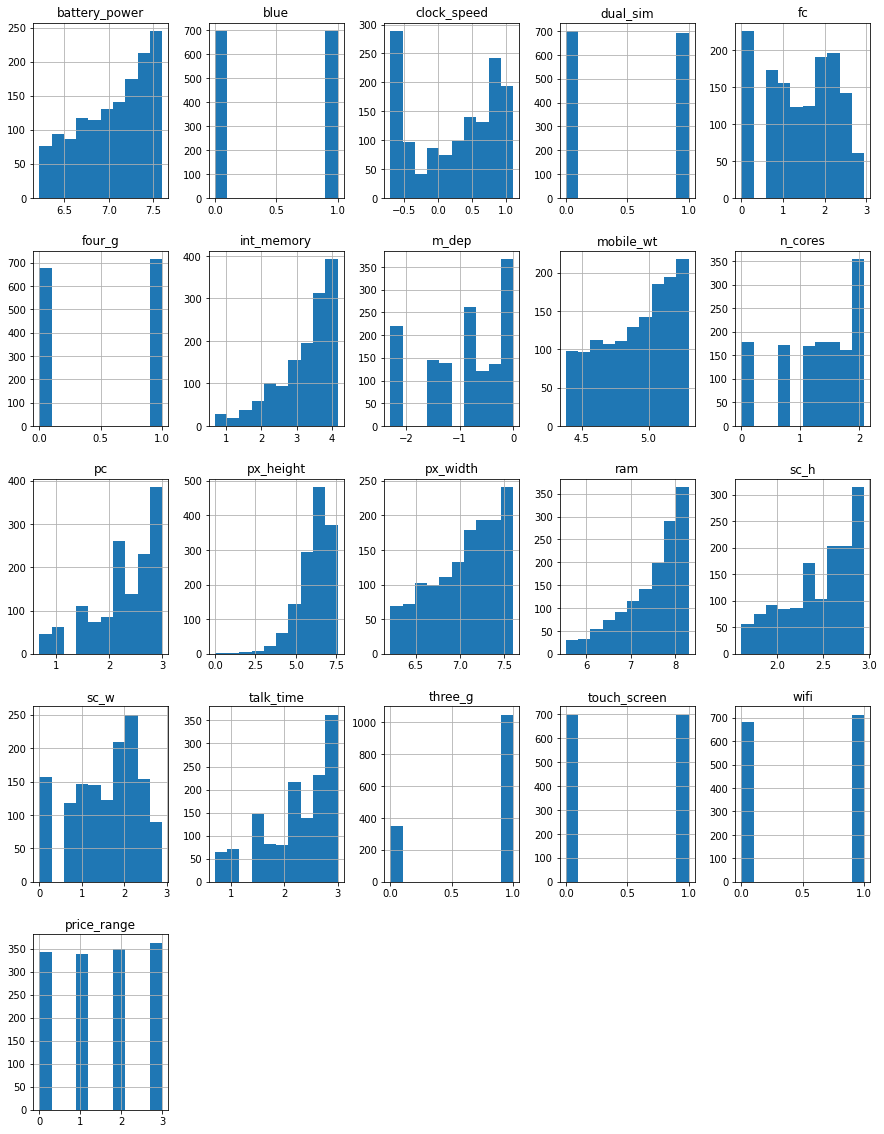

In [83]:
%matplotlib inline
mobile_price_log.hist(figsize=(15,20))
plt.show()

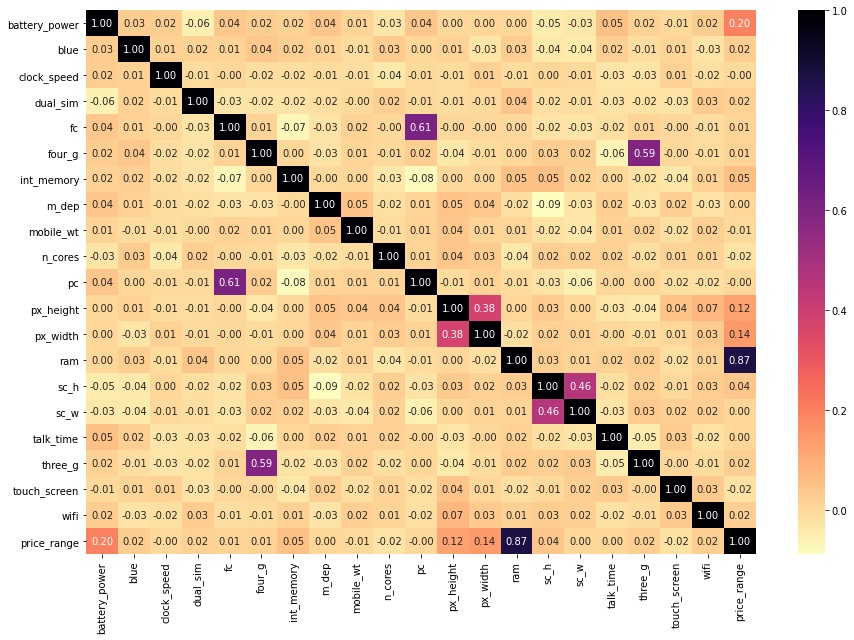

In [84]:
plt.figure(figsize=(15, 10))
sn.heatmap(mobile_price_log.corr(), annot=True, fmt='.2f',cmap=plt.cm.magma_r)
plt.show()

In [85]:
for train_idx,test_idx in spliter.split(mobile_price_log.drop('price_range',axis=1),mobile_price_log.price_range):
    train_log=mobile_price_log.iloc[train_idx]
    test_log=mobile_price_log.iloc[test_idx]    

In [86]:
train_log.shape

(1044, 21)

In [87]:
test_log.shape

(349, 21)

In [88]:
classifier=LogisticRegression(max_iter=1000)

In [89]:
classifier.fit(train_log.drop('price_range',axis=1),train_log.price_range)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [90]:
# predict train data with model
pred=classifier.predict(train_log.drop('price_range',axis=1))

In [91]:
print(metrics.classification_report(train_log.price_range,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       257
           1       0.89      0.85      0.87       253
           2       0.88      0.87      0.88       262
           3       0.94      0.97      0.95       272

    accuracy                           0.91      1044
   macro avg       0.91      0.91      0.91      1044
weighted avg       0.91      0.91      0.91      1044



In [92]:
metrics.confusion_matrix(train_log.price_range,pred)

array([[245,  12,   0,   0],
       [ 13, 216,  24,   0],
       [  0,  15, 229,  18],
       [  0,   0,   8, 264]], dtype=int64)

In [93]:
# predict test data with model
pred=classifier.predict(test_log.drop('price_range',axis=1))

In [94]:
print(metrics.classification_report(test_log.price_range,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        86
           1       0.90      0.82      0.86        85
           2       0.86      0.89      0.87        87
           3       0.93      0.97      0.95        91

    accuracy                           0.91       349
   macro avg       0.91      0.90      0.90       349
weighted avg       0.91      0.91      0.90       349



In [95]:
metrics.confusion_matrix(test_log.price_range,pred)

array([[81,  5,  0,  0],
       [ 5, 70, 10,  0],
       [ 0,  3, 77,  7],
       [ 0,  0,  3, 88]], dtype=int64)

<div>Of course, contrary to our expectations, the accuracy of the model did not decrease. Because the accuracy of the model in the previous series of exercises on the model was the same!</div>

In [96]:
mobile_price_exp=deepcopy(mobile_price)

In [97]:
# apply exp transform on ordinal features of dataset
mobile_price_exp[ordinal_features]=mobile_price_exp[ordinal_features]**(1/1.2)
mobile_price_exp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,274.006002,0,1.929089,0,1.000000,0,5.061140,0.653320,78.547351,1.781797,...,12.139245,250.477179,689.670309,6.240251,5.061140,11.631293,0,0,1,1
1,321.752146,1,0.561231,1,0.000000,1,27.346173,0.742874,59.972077,2.498050,...,290.987153,560.635142,708.109966,10.601666,2.498050,5.061140,1,1,0,2
2,195.925214,1,0.561231,1,1.781797,1,22.079363,0.915944,63.261575,3.823622,...,384.151729,495.942206,701.824417,7.376108,1.781797,6.240251,1,1,0,2
3,210.893210,1,2.145936,0,0.000000,0,6.812921,0.830313,58.128986,4.451018,...,372.201380,512.744738,738.928578,10.079368,5.656854,7.376108,1,0,0,2
4,521.104658,1,1.164084,0,8.477858,1,23.417682,0.653320,61.803907,1.781797,...,370.159681,371.180811,421.313955,5.656854,1.781797,9.551598,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,260.925837,1,0.561231,1,0.000000,1,1.781797,0.830313,48.725341,4.451018,...,373.731185,537.507882,225.933373,8.477858,3.174802,11.631293,1,1,0,0
1996,555.224722,1,2.217232,1,0.000000,0,21.178109,0.261532,78.199025,3.174802,...,293.664136,555.224722,570.956585,7.376108,6.812921,10.079368,1,1,1,2
1997,542.480218,0,0.915944,1,1.000000,1,19.811563,0.742874,49.490267,5.656854,...,281.038900,475.627323,802.440548,6.240251,1.000000,3.823622,1,1,0,3
1998,446.299595,0,0.915944,0,3.174802,1,24.301413,0.146780,63.261575,3.823622,...,127.433242,226.496938,281.308689,11.118864,6.812921,11.631293,1,1,1,0


In [98]:
# remove nan and inf values caused by log 
mobile_price_exp=mobile_price_exp[mobile_price_exp.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [99]:
mobile_price_exp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,274.006002,0,1.929089,0,1.000000,0,5.061140,0.653320,78.547351,1.781797,...,12.139245,250.477179,689.670309,6.240251,5.061140,11.631293,0,0,1,1
1,321.752146,1,0.561231,1,0.000000,1,27.346173,0.742874,59.972077,2.498050,...,290.987153,560.635142,708.109966,10.601666,2.498050,5.061140,1,1,0,2
2,195.925214,1,0.561231,1,1.781797,1,22.079363,0.915944,63.261575,3.823622,...,384.151729,495.942206,701.824417,7.376108,1.781797,6.240251,1,1,0,2
3,210.893210,1,2.145936,0,0.000000,0,6.812921,0.830313,58.128986,4.451018,...,372.201380,512.744738,738.928578,10.079368,5.656854,7.376108,1,0,0,2
4,521.104658,1,1.164084,0,8.477858,1,23.417682,0.653320,61.803907,1.781797,...,370.159681,371.180811,421.313955,5.656854,1.781797,9.551598,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,260.925837,1,0.561231,1,0.000000,1,1.781797,0.830313,48.725341,4.451018,...,373.731185,537.507882,225.933373,8.477858,3.174802,11.631293,1,1,0,0
1996,555.224722,1,2.217232,1,0.000000,0,21.178109,0.261532,78.199025,3.174802,...,293.664136,555.224722,570.956585,7.376108,6.812921,10.079368,1,1,1,2
1997,542.480218,0,0.915944,1,1.000000,1,19.811563,0.742874,49.490267,5.656854,...,281.038900,475.627323,802.440548,6.240251,1.000000,3.823622,1,1,0,3
1998,446.299595,0,0.915944,0,3.174802,1,24.301413,0.146780,63.261575,3.823622,...,127.433242,226.496938,281.308689,11.118864,6.812921,11.631293,1,1,1,0


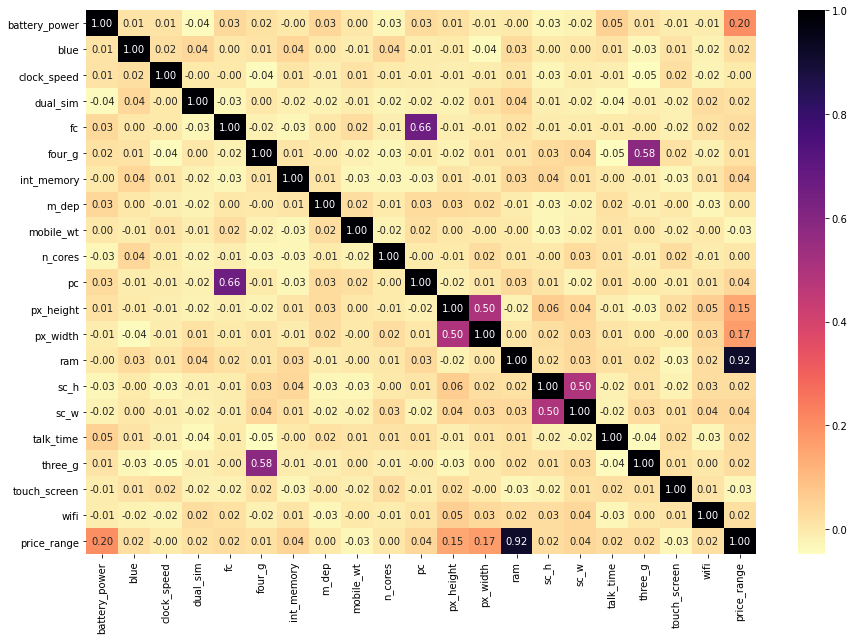

In [100]:
plt.figure(figsize=(15, 10))
sn.heatmap(mobile_price_exp.corr(), annot=True, fmt='.2f',cmap=plt.cm.magma_r)
plt.show()

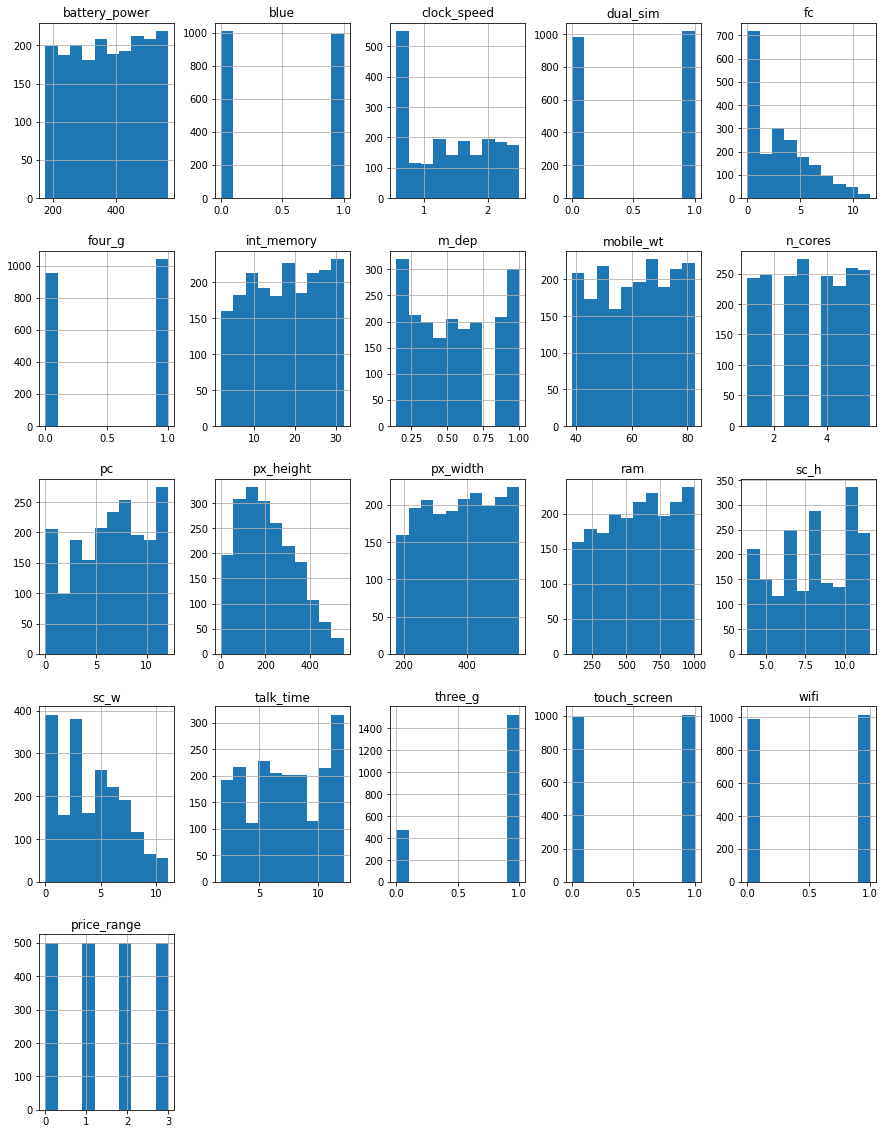

In [101]:
%matplotlib inline
mobile_price_exp.hist(figsize=(15,20))
plt.show()

In [102]:
for train_idx,test_idx in spliter.split(mobile_price_exp.drop('price_range',axis=1),mobile_price_exp.price_range):
    train_exp=mobile_price_exp.iloc[train_idx]
    test_exp=mobile_price_exp.iloc[test_idx]   

In [103]:
classifier.fit(train_exp.drop('price_range',axis=1),train_exp.price_range)

c:\users\erfansky\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [104]:
# predict train data with model
pred=classifier.predict(train_exp.drop('price_range',axis=1))

In [105]:
print(metrics.classification_report(train_exp.price_range,pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       375
           1       0.70      0.69      0.70       375
           2       0.62      0.58      0.60       375
           3       0.75      0.82      0.78       375

    accuracy                           0.74      1500
   macro avg       0.74      0.74      0.74      1500
weighted avg       0.74      0.74      0.74      1500



In [106]:
metrics.confusion_matrix(train_exp.price_range,pred)

array([[323,  50,   2,   0],
       [ 41, 260,  66,   8],
       [  1,  60, 219,  95],
       [  0,   1,  66, 308]], dtype=int64)

In [107]:
# predict test data with model
pred=classifier.predict(test_exp.drop('price_range',axis=1))

In [108]:
print(metrics.classification_report(test_exp.price_range,pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       125
           1       0.58      0.60      0.59       125
           2       0.51      0.56      0.53       125
           3       0.78      0.75      0.76       125

    accuracy                           0.68       500
   macro avg       0.69      0.68      0.68       500
weighted avg       0.69      0.68      0.68       500



In [109]:
metrics.confusion_matrix(test_exp.price_range,pred)

array([[100,  25,   0,   0],
       [ 12,  75,  37,   1],
       [  0,  29,  70,  26],
       [  0,   0,  31,  94]], dtype=int64)

# D

In [110]:
mobile_price_area=deepcopy(mobile_price)

In [111]:
# creating new feture in data set: mobile_area
mobile_price_area['mobile_area']=mobile_price_area.sc_h*mobile_price_area.sc_w

In [112]:
mobile_price_area

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,mobile_area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,180


# 7

In [122]:
from sklearn.svm import SVC

# svm on original dataset

In [156]:
### train svm on original dataset

for train_idx,test_idx in spliter.split(mobile_price,mobile_price.price_range):
    train=mobile_price.iloc[train_idx]
    test=mobile_price.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [157]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.92      0.96      0.94       375
           2       0.95      0.89      0.92       375
           3       0.95      0.97      0.96       375

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



<AxesSubplot:>

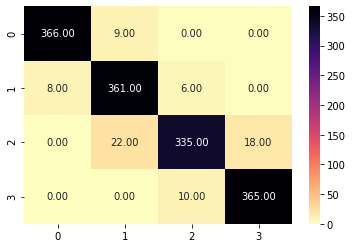

In [158]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [159]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       125
           1       0.95      0.98      0.96       125
           2       0.96      0.91      0.93       125
           3       0.95      0.97      0.96       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



<AxesSubplot:>

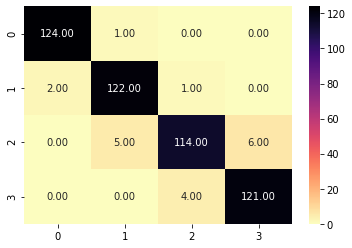

In [160]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on mobile_price_q1

In [165]:
### train svm on mobile_price_q1

for train_idx,test_idx in spliter.split(mobile_price_q1,mobile_price_q1.price_range):
    train=mobile_price_q1.iloc[train_idx]
    test=mobile_price_q1.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [166]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       375
           1       0.75      0.77      0.76       375
           2       0.72      0.73      0.73       375
           3       0.86      0.84      0.85       375

    accuracy                           0.80      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.80      0.80      0.80      1500



<AxesSubplot:>

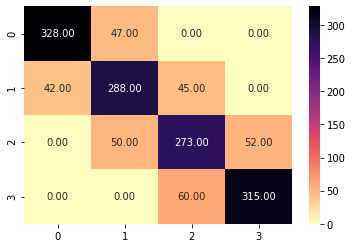

In [167]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [168]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       125
           1       0.73      0.76      0.75       125
           2       0.73      0.68      0.70       125
           3       0.86      0.91      0.89       125

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



<AxesSubplot:>

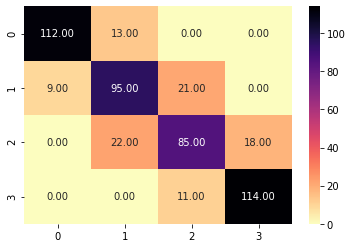

In [169]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on mobile_price_one_hot

In [170]:
### train svm on mobile_price_one_hot

for train_idx,test_idx in spliter.split(mobile_price_one_hot,mobile_price_one_hot.price_range):
    train=mobile_price_one_hot.iloc[train_idx]
    test=mobile_price_one_hot.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [171]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.92      0.96      0.94       375
           2       0.95      0.89      0.92       375
           3       0.95      0.97      0.96       375

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



<AxesSubplot:>

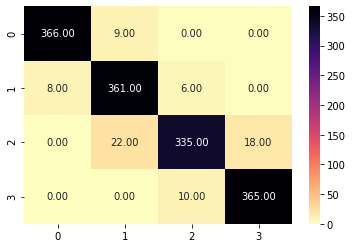

In [172]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [173]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       125
           1       0.95      0.98      0.97       125
           2       0.96      0.91      0.93       125
           3       0.95      0.97      0.96       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



<AxesSubplot:>

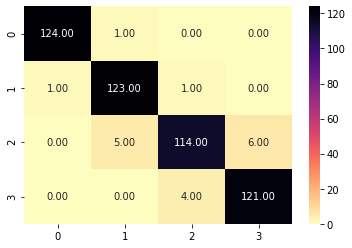

In [174]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on mobile_price_log

In [175]:
### train svm on mobile_price_log

for train_idx,test_idx in spliter.split(mobile_price_log,mobile_price_log.price_range):
    train=mobile_price_log.iloc[train_idx]
    test=mobile_price_log.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [176]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       257
           1       0.73      0.61      0.67       253
           2       0.53      0.63      0.57       262
           3       0.73      0.80      0.76       272

    accuracy                           0.72      1044
   macro avg       0.74      0.72      0.73      1044
weighted avg       0.74      0.72      0.73      1044



<AxesSubplot:>

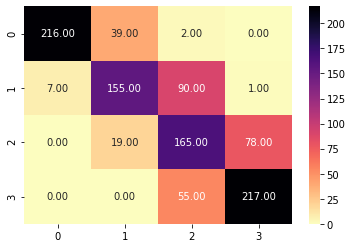

In [177]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [178]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88        86
           1       0.66      0.45      0.53        85
           2       0.45      0.62      0.52        87
           3       0.71      0.74      0.72        91

    accuracy                           0.66       349
   macro avg       0.69      0.66      0.66       349
weighted avg       0.69      0.66      0.67       349



<AxesSubplot:>

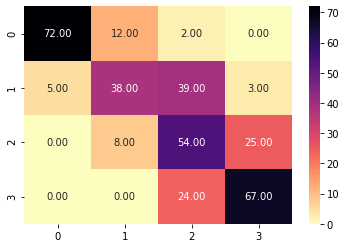

In [179]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on mobile_price_exp

In [180]:
### train svm on mobile_price_exp

for train_idx,test_idx in spliter.split(mobile_price_exp,mobile_price_exp.price_range):
    train=mobile_price_exp.iloc[train_idx]
    test=mobile_price_exp.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [181]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       375
           1       0.92      0.95      0.93       375
           2       0.95      0.89      0.92       375
           3       0.96      0.97      0.96       375

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



<AxesSubplot:>

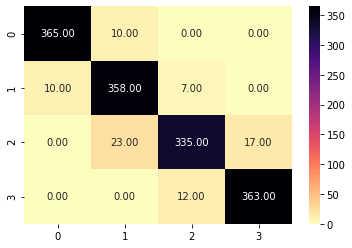

In [182]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [183]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       125
           1       0.95      0.98      0.97       125
           2       0.96      0.92      0.94       125
           3       0.96      0.97      0.96       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



<AxesSubplot:>

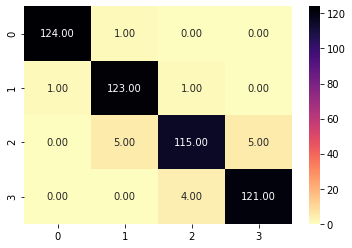

In [184]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on mobile_price_area

In [185]:
### train svm on mobile_area

for train_idx,test_idx in spliter.split(mobile_price_area,mobile_price_area.price_range):
    train=mobile_price_area.iloc[train_idx]
    test=mobile_price_area.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [186]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       375
           1       0.92      0.96      0.94       375
           2       0.95      0.89      0.92       375
           3       0.95      0.97      0.96       375

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



<AxesSubplot:>

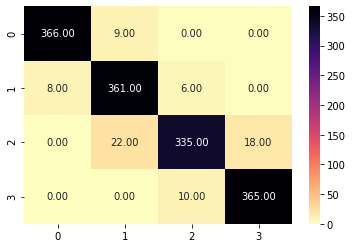

In [187]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [188]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       125
           1       0.95      0.98      0.96       125
           2       0.96      0.92      0.94       125
           3       0.96      0.97      0.96       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



<AxesSubplot:>

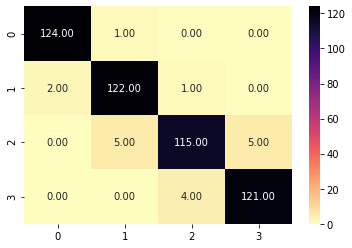

In [189]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# svm on the dataset of all 5 transformes

In [215]:
mobile_price_all=deepcopy(mobile_price)

# transform data
#binning battery_power
discretizer=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='quantile')
mobile_price_all['discrete_battary_power']=discretizer.fit_transform(mobile_price.battery_power.values.reshape((-1,1))).astype(np.int64)
mobile_price_all.drop('battery_power',axis=1,inplace=True)

# one hot encoding
cat_feature_list=['blue', 'dual_sim', 'four_g','three_g','touch_screen', 'wifi','discrete_battary_power']
one_hot_encoder=OneHotEncoder()
battery_cat=one_hot_encoder.fit_transform(mobile_price_all[cat_feature_list].values).toarray().astype(np.int32)

mobile_price_all=mobile_price_all.drop(cat_feature_list,axis=1)
for i in range(len(cat_feature_list)):
    label=cat_feature_list[i]
    mobile_price_all[f'not {label}']=battery_cat[:,2*i]
    mobile_price_all[f'{label}']=battery_cat[:,2*i+1]  

cat_feature_list=['not blue', 'blue', 'not dual_sim', 'dual_sim',
       'not four_g', 'four_g', 'not three_g', 'three_g', 'not touch_screen',
       'touch_screen', 'not wifi', 'wifi', 'not discrete_battary_power',
       'discrete_battary_power']
    
ordinal_features=list(mobile_price_all.columns)
for i in cat_feature_list:
    ordinal_features.remove(i)
ordinal_features.remove('price_range')

# log transform
mobile_price_all[ordinal_features]=np.log(mobile_price_all[ordinal_features])

# exp transform
mobile_price_all[ordinal_features]=mobile_price_all[ordinal_features]**(1/1.2)

mobile_price_all=mobile_price_all.drop('m_dep',axis=1)

# remove nan and inf values caused by log  and exp transformation
mobile_price_all=mobile_price_all[mobile_price_all.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

mobile_price_all

,clock_speed,fc,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,...,not four_g,four_g,not three_g,three_g,not touch_screen,touch_screen,not wifi,wifi,not discrete_battary_power,discrete_battary_power
0,0.820317,0.000000,1.741549,3.973717,0.736808,0.736808,2.495088,4.836015,5.564458,1.927061,...,1,0,1,0,1,0,0,1,1,0
4,0.242121,2.192295,3.031406,3.790941,0.736808,2.244954,5.119350,5.121337,5.212557,1.840584,...,0,1,0,1,0,1,1,0,0,0
6,0.589737,1.312843,2.003763,3.781819,1.840584,2.003763,4.415629,5.016270,5.702271,2.192295,...,0,1,0,1,1,0,0,1,0,0
11,0.820317,1.486718,2.838107,3.935552,1.840584,2.421743,3.834631,5.008511,5.803540,2.244954,...,0,1,0,1,0,1,0,1,0,0
13,0.779781,1.741549,2.381768,4.006463,1.312843,2.072646,4.352283,5.224740,5.594071,1.741549,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,0.895091,1.840584,2.896842,3.464989,0.000000,1.927061,4.825467,5.218891,4.258759,1.486718,...,0,1,0,1,1,0,1,0,0,0
1991,0.736808,2.072646,3.031406,3.649088,1.840584,2.459436,1.312843,4.825467,5.764390,2.459436,...,0,1,0,1,0,1,1,0,0,0
1992,1.053642,0.000000,2.528906,4.006463,1.081526,1.312843,4.670098,5.360969,5.105248,1.625797,...,1,0,0,1,0,1,0,1,1,0
1994,0.820317,0.000000,3.116505,3.457295,0.000000,0.736808,4.616762,5.214676,5.826371,2.381768,...,1,0,0,1,0,1,1,0,0,1


In [216]:
### train svm on mobile_price_exp

for train_idx,test_idx in spliter.split(mobile_price_all,mobile_price_all.price_range):
    train=mobile_price_q1.iloc[train_idx]
    test=mobile_price_q1.iloc[test_idx]

svm=SVC(degree=5,max_iter=1000,random_state=42)
svm.fit(train.drop('price_range',axis=1),train.price_range)

SVC(degree=5, max_iter=1000, random_state=42)

In [217]:
# predict train data with model
pred=svm.predict(train.drop('price_range',axis=1))
print(metrics.classification_report(train.price_range,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       170
           1       0.71      0.68      0.69       159
           2       0.70      0.72      0.71       172
           3       0.87      0.87      0.87       189

    accuracy                           0.79       690
   macro avg       0.79      0.79      0.79       690
weighted avg       0.79      0.79      0.79       690



<AxesSubplot:>

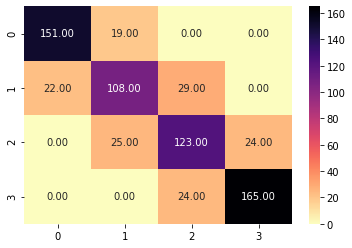

In [218]:
# confusion matrix for train data with model
sn.heatmap(metrics.confusion_matrix(train.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

In [219]:
# predict test data with model
pred=svm.predict(test.drop('price_range',axis=1))
print(metrics.classification_report(test.price_range,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        51
           1       0.67      0.73      0.70        52
           2       0.73      0.65      0.69        63
           3       0.87      0.84      0.86        64

    accuracy                           0.78       230
   macro avg       0.78      0.78      0.78       230
weighted avg       0.78      0.78      0.78       230



<AxesSubplot:>

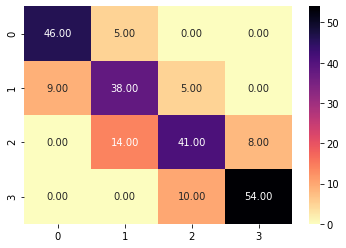

In [220]:
# confusion matrix for test data with model
sn.heatmap(metrics.confusion_matrix(test.price_range,pred), annot=True, fmt='.2f',cmap=plt.cm.magma_r)

# Implementation of backward selection algorithm

In [336]:
class BackwardSelectin:
    def __init__(self,
                 estimator,
                 scoring_strategy='AUC',
                 n_features_to_select=10,
                 stop_if_no_decreas=True,
                 problem_type='classification'):
        self.estimator=estimator
        self.n_features_to_select=n_features_to_select
        self.stop_if_no_decreas=stop_if_no_decreas
        self.problem_type=problem_type
        self.scoring_strategy=eval('self.'+scoring_strategy)
        
    def fit(self,x,y):
        self.feature_names_=list(x.columns)
        train_features=list(x.columns)
        features=list(x.columns)
        # full model
        estimator=self.estimator
        pred=estimator.fit(x,y).predict(x)
        preveus_score=self.scoring_strategy(y,pred)
        for i in range(self.n_features_to_select):
            scores=np.zeros((len(features)))
            for j in range(len(features)):
                train_features=deepcopy(self.feature_names_)
                train_features.remove(features[j])
                estimator.fit(x[train_features],y)
                pred=estimator.predict(x[train_features])
                scores[j]=self.scoring_strategy(y,pred)
            if self.stop_if_no_decreas and scores.max()>preveus_score:
                return self.feature_names_
            preveus_score=scores.max()
            worst=features[scores.argmax()]
            self.feature_names_.remove(worst)
            features.remove(worst)
        return self.feature_names_
    def AUC(self,y_true,pred):
        fpr, tpr, thresholds = metrics.roc_curve(y_true.values, pred)
        return metrics.auc(fpr, tpr)

In [337]:
classifier=LogisticRegression(random_state=42)

In [338]:
# select 10 features with backward selection method
bs=BackwardSelectin(classifier,stop_if_no_decreas=False)
selected_features=bs.fit(x_train,y_train)

In [339]:
selected_features

['int_memory',
 'mobile_wt',
 'pc',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [340]:
x_train[selected_features]

,int_memory,mobile_wt,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.004377,0.033071,0.002675,0.829698,0.003161,0.001945,0.003891,0.000243,0.000000,0.000000
1,0.016025,0.029466,0.005169,0.781627,0.001551,0.000000,0.005169,0.000000,0.000000,0.000258
2,0.027682,0.053558,0.005416,0.495864,0.011434,0.010832,0.004212,0.000602,0.000000,0.000000
3,0.000953,0.049257,0.004131,0.872652,0.002860,0.001589,0.002542,0.000318,0.000318,0.000318
4,0.015492,0.050799,0.002882,0.932043,0.002522,0.001801,0.006485,0.000360,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1486,0.019620,0.050389,0.000892,0.570778,0.003567,0.000446,0.007135,0.000446,0.000000,0.000446
1487,0.004531,0.032321,0.003323,0.659417,0.002417,0.000906,0.003323,0.000302,0.000302,0.000000
1488,0.006167,0.042104,0.000000,0.787212,0.003615,0.000000,0.004040,0.000000,0.000000,0.000000
1489,0.008450,0.060930,0.001334,0.543479,0.005782,0.000889,0.003113,0.000000,0.000000,0.000000


In [341]:
classifier=LogisticRegression(max_iter=1000,random_state=42)
classifier.fit(x_train[selected_features],y_train)
pred_train=classifier.predict(x_train[selected_features])

In [344]:
train_precision=metrics.precision_score(y_train,pred_train)
print('precision for train data: ',train_precision)

precision for train data:  0.780952380952381


In [345]:
train_recall=metrics.recall_score(y_train,pred_train)
print('recall for train data: ',train_recall)

recall for train data:  0.8793565683646113


In [346]:
train_f1_score=metrics.f1_score(y_train,pred_train)
print('f1-score for train data: ',train_f1_score)

f1-score for train data:  0.8272383354350568


In [347]:
pred_test=classifier.predict(x_test[selected_features])

In [348]:
test_precision=metrics.precision_score(y_test,pred_test)
print('precision for test data: ',test_precision)

precision for test data:  0.7663230240549829


In [349]:
test_recall=metrics.recall_score(y_test,pred_test)
print('recall for test data: ',test_recall)

recall for test data:  0.8955823293172691


In [350]:
test_f1_score=metrics.f1_score(y_test,pred_test)
print('f1-score for test data: ',test_f1_score)

f1-score for test data:  0.8259259259259261


In [351]:
classifier.coef_

array([[-1.01651268, -4.2430088 , -0.26512859,  8.00314177, -0.36365244,
        -0.15604157, -0.32506609, -0.02215078, -0.01758225, -0.01434175]])